### Start a spark session

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

:: loading settings :: url = jar:file:/home/oliver/projects/hackathons/startHack25/belimo_pythonAnalysis/demo/spark353-env/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/oliver/.ivy2/cache
The jars for the packages stored in: /home/oliver/.ivy2/jars
io.delta#delta-sharing-spark_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a294bd12-c258-49f6-a799-5e4cd61b6759;1.0
	confs: [default]
	found io.delta#delta-sharing-spark_2.12;3.3.0 in central
	found io.delta#delta-spark_2.12;3.3.0 in central
	found io.delta#delta-storage;3.3.0 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
	found io.delta#delta-sharing-client_2.12;1.2.2 in central
	found org.apache.httpcomponents#httpclient;4.5.14 in central
	found org.apache.httpcomponents#httpcore;4.4.16 in central
	found commons-logging#commons-logging;1.2 in central
	found commons-codec#commons-codec;1.11 in central
:: resolution report :: resolve 249ms :: artifacts dl 10ms
	:: modules in use:
	commons-codec#commons-codec;1.11 from central in [default]
	commons-logging#commons-logging;1.2 from central in [default]
	io.delta#delta

### List Tables
Use the provided config

In [2]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

## Dataprofile
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [3]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile")


In [4]:
df.toPandas()

25/03/20 09:43:32 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,id,access,basetype,description,format,name,privacy,restriction,definedBy,unit
0,evcloud.00009,r,int,Valve Type,application/vnd.belimo.enum;0|1,ValveType,False,uint8,evcloud/1.2,None
1,evcloud.10,r,int,DN Size of Valve,None,DN_Size,False,int32,evcloud/1.2,None
2,evcloud.100,r,real,Relative Flow in %,None,RelFlow_Fb_Rel2Vmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
3,evcloud.110,r,real,Absolute Flow in m3/s,None,AbsFlow_Fb_m3s,False,"[-2147483.648,2147483.647]",evcloud/1.2,cubicMetrePerSecond
4,evcloud.120,rw,real,Maximum Power Limit in %,None,Pmax_Rel_Write,False,"[0.5,100]",evcloud/1.2,percent
5,evcloud.130,r,real,Relative Power %,None,RelPower_Fb_Rel2Pmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
6,evcloud.140,r,real,Absolute Power in W,None,AbsPower_Fb_W,False,"[-2147483.648,2147483.647]",evcloud/1.2,watt
7,evcloud.150,r,real,Temperature 1 remote in K,None,T1_remote_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
8,evcloud.160,r,real,Temperature 2 embeded in K,None,T2_embeded_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
9,evcloud.170,rw,int,Delta T Limitation Type,application/vnd.belimo.enum;1|2|3,DeltaT_Limitation_Write,False,uint8,evcloud/1.2,None


## Device Data
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [5]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
first_device_id = df.select("device_id").first()["device_id"]
df_filtered = df.filter(df.device_id == first_device_id)
df_filtered_small = df_filtered.limit(10000)  # Reduce to 10,000 rows
df_filtered = df_filtered_small.toPandas()

NameError: name 'df_sampled' is not defined

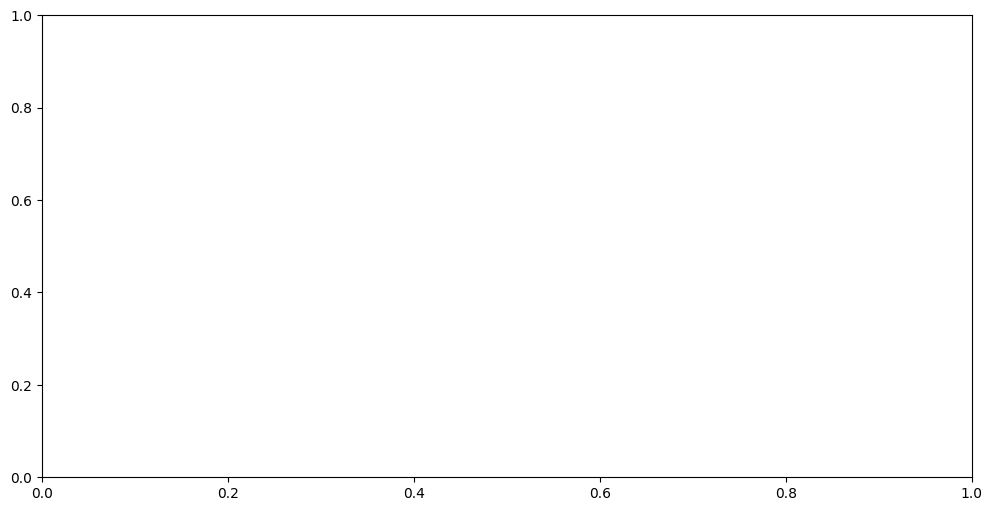

In [ ]:
# Create figure and first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Select a specific time window (for example, first day or week)
start_date = '2019-12-01'
end_date = '2019-12-05'
mask = (df_sampled['sample_time'] >= start_date) & (df_sampled['sample_time'] <= end_date)
df_zoom = df_sampled[mask]

# Plot temperature on first y-axis
ax1.plot(df_zoom["sample_time"], df_zoom["T1_remote_C"], 'b-', label='Temperature')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis and plot flow rate
ax2 = ax1.twinx()
ax2.plot(df_zoom["sample_time"], df_zoom["AbsFlow_Fb_m3s"], 'r-', label='Flow Rate')
ax2.set_ylabel('Flow Rate (m³/s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and adjust layout
plt.title('Temperature and Flow Rate (Dec 1-5, 2019)')
fig.tight_layout()

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True)
plt.show()

### Efficiency Plot

In [7]:
# Cell 1: Import libraries and setup
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
plt.style.use('ggplot')

In [8]:
# Cell 2: Load and prepare data
# Get list of unique device IDs
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
device_ids = df.select("device_id").distinct().limit(5).toPandas()["device_id"].tolist()
print(f"Analyzing {len(device_ids)} devices")

Analyzing 5 devices


In [49]:
# Cell 3: Function to load device data
def get_device_data(device_id, sample_fraction=0.1):
    df_device = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
                    .filter(col("device_id") == device_id) \
                    .select("AbsFlow_Fb_m3s", "DeltaT_K") \
                    .sample(False, sample_fraction) \
                    .toPandas()
    
    # Filter out zeros and nulls
    df_device = df_device.dropna()
    df_device = df_device[(df_device['AbsFlow_Fb_m3s'] > 0) & (df_device['DeltaT_K'] > 0)]
    return df_device

25/03/20 01:41:09 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_316d611f8ecb08666b477384e0a43d84cc9b8085c951d1091e846ba079359b10/_delta_log/00000000000000000000.json.
25/03/20 01:41:09 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_316d611f8ecb08666b477384e0a43d84cc9b8085c951d1091e846ba079359b10/_delta_log.
25/03/20 01:41:27 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_11c18a147af52e9707f6e12f18e274e24f36b294d653f698192d66c7fb46f991/_delta_log/00000000000000000000.json.
25/03/20 01:41:28 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_11c18a147af52e9707f6e12f18e274e24f36b294d653f6981

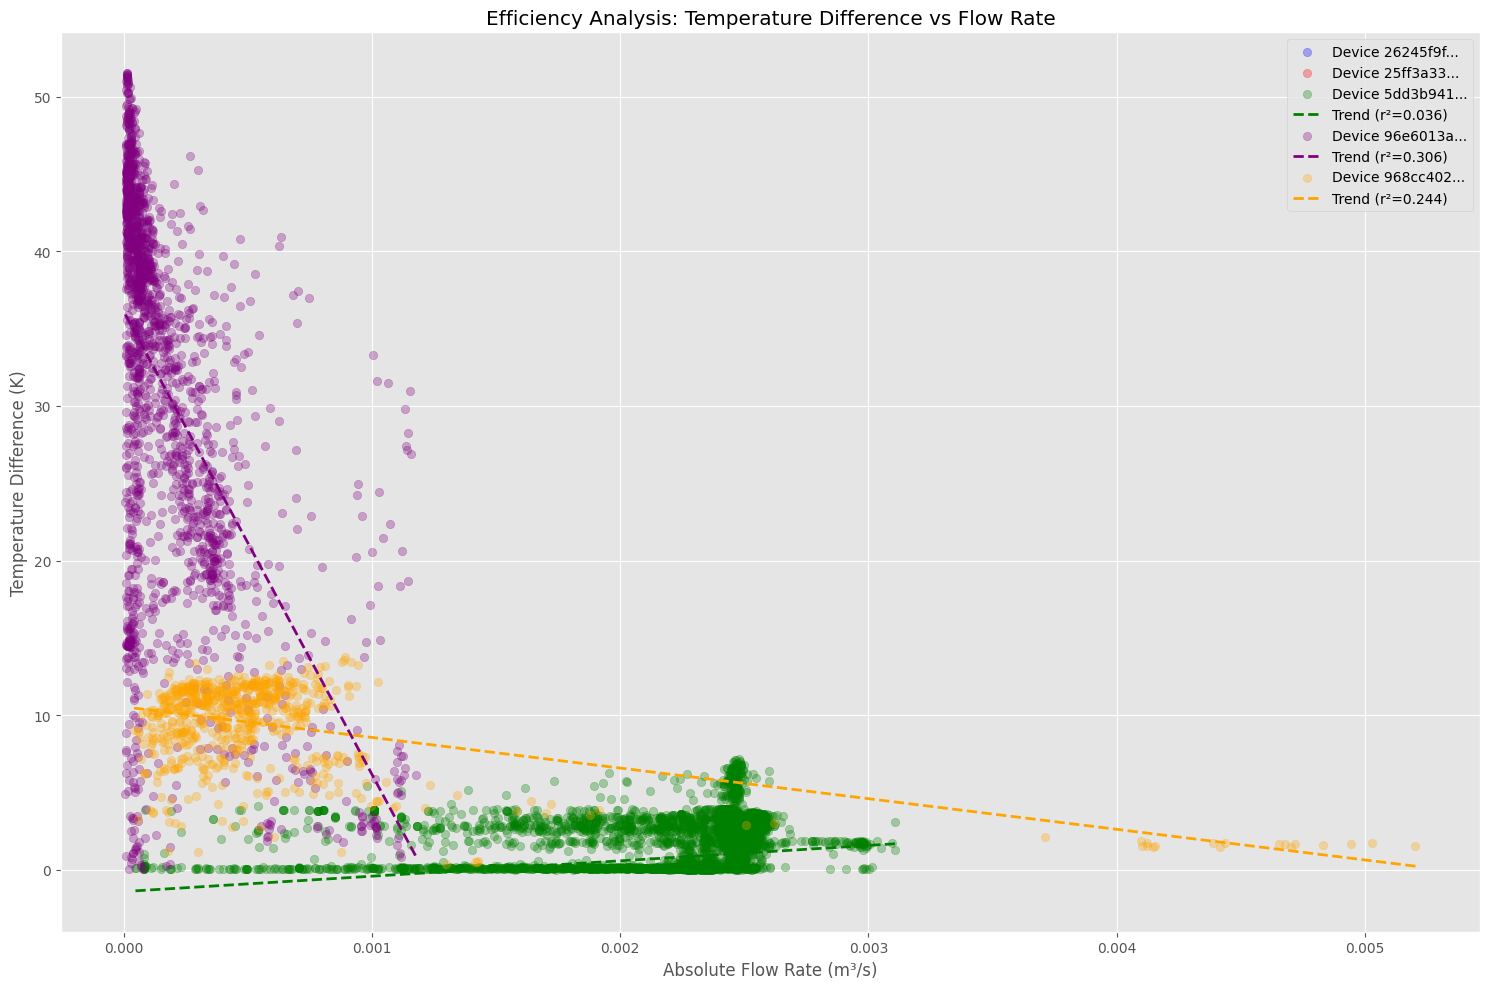

In [50]:
# Cell 4: Scatter plot with trend lines for multiple devices
plt.figure(figsize=(15, 10))
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i, device_id in enumerate(device_ids):
    df_device = get_device_data(device_id)
    
    # Scatter plot
    plt.scatter(df_device['AbsFlow_Fb_m3s'], df_device['DeltaT_K'], 
                alpha=0.3, label=f'Device {device_id[:8]}...', color=colors[i % len(colors)])
    
    # Trend line
    if len(df_device) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            df_device['AbsFlow_Fb_m3s'], df_device['DeltaT_K'])
        
        x = np.array([df_device['AbsFlow_Fb_m3s'].min(), df_device['AbsFlow_Fb_m3s'].max()])
        y = slope * x + intercept
        plt.plot(x, y, color=colors[i % len(colors)], 
                 linestyle='--', linewidth=2,
                 label=f'Trend (r²={r_value**2:.3f})')

plt.xlabel('Absolute Flow Rate (m³/s)')
plt.ylabel('Temperature Difference (K)')
plt.title('Efficiency Analysis: Temperature Difference vs Flow Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

25/03/20 02:06:03 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log/00000000000000000000.json.
25/03/20 02:06:03 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log.


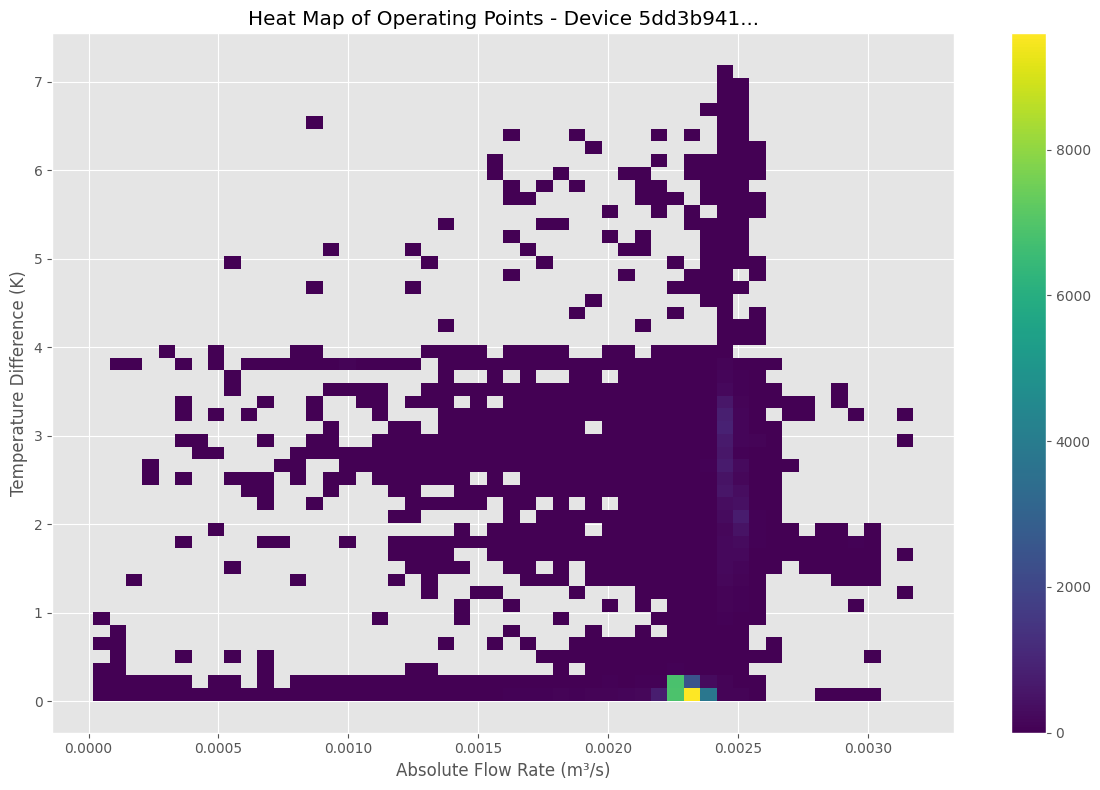

In [56]:
# Cell 5: Heat map for a single device
def plot_heatmap(device_id):
    df_heatmap = get_device_data(device_id, sample_fraction=0.2)
    
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df_heatmap, x="AbsFlow_Fb_m3s", y="DeltaT_K", 
                 bins=50, cbar=True, cmap="viridis")
    plt.title(f'Heat Map of Operating Points - Device {device_id[:8]}...')
    plt.xlabel('Absolute Flow Rate (m³/s)')
    plt.ylabel('Temperature Difference (K)')
    plt.tight_layout()
    plt.show()

# Use for first device
plot_heatmap(device_ids[2])

25/03/20 02:07:10 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log/00000000000000000000.json.
25/03/20 02:07:10 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log.


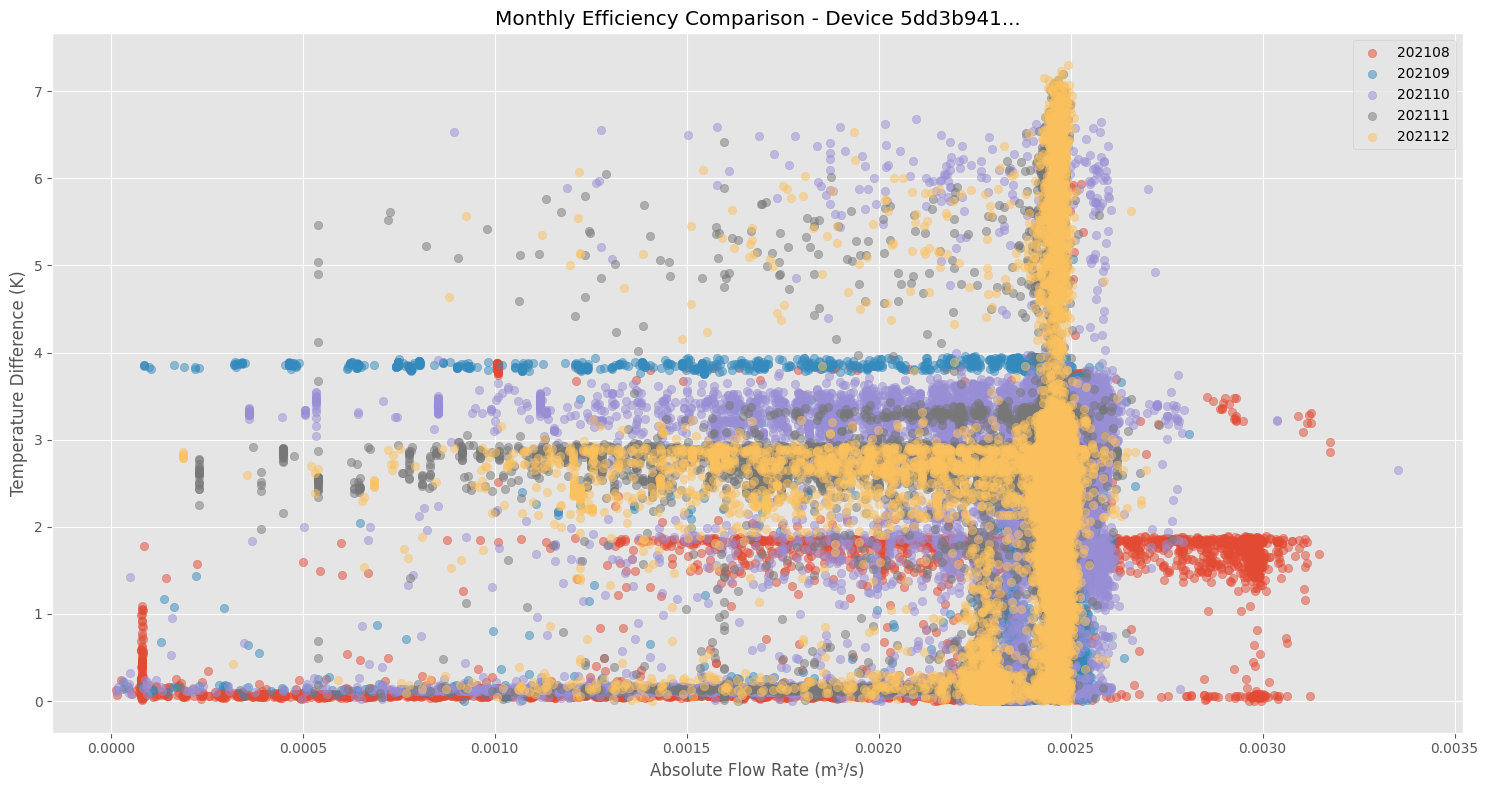

In [57]:
# Cell 6: Monthly comparison function
def plot_monthly_comparison(device_id):
    df_monthly = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
                    .filter(col("device_id") == device_id) \
                    .select("AbsFlow_Fb_m3s", "DeltaT_K", "year_month") \
                    .toPandas()
    
    df_monthly = df_monthly.dropna()
    df_monthly = df_monthly[(df_monthly['AbsFlow_Fb_m3s'] > 0) & (df_monthly['DeltaT_K'] > 0)]
    
    plt.figure(figsize=(15, 8))
    recent_months = sorted(df_monthly['year_month'].unique())[-6:]
    
    for month in recent_months:
        month_data = df_monthly[df_monthly['year_month'] == month]
        if len(month_data) > 10:
            plt.scatter(month_data['AbsFlow_Fb_m3s'], month_data['DeltaT_K'], 
                       alpha=0.5, label=month)
    
    plt.xlabel('Absolute Flow Rate (m³/s)')
    plt.ylabel('Temperature Difference (K)')
    plt.title(f'Monthly Efficiency Comparison - Device {device_id[:8]}...')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Use for first device
plot_monthly_comparison(device_ids[2])

### Valve Position Plots

In [90]:
# Create scatter plot of valve position vs flow rate
df_device = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data") \
    .filter(col("device_id") == device_ids[2]) \
    .select("AbsFlow_Fb_m3s", "RelPos_Fb", "sample_time", "DeltaT_K", "RelPower_Fb_Rel2Pmax") \
    .toPandas()

25/03/20 08:31:49 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log/00000000000000000000.json.
25/03/20 08:31:49 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6f2aacb39908e12d489931465b3c050276e7b3b5f3c91f409bea7f2b53ae1b6c/_delta_log.


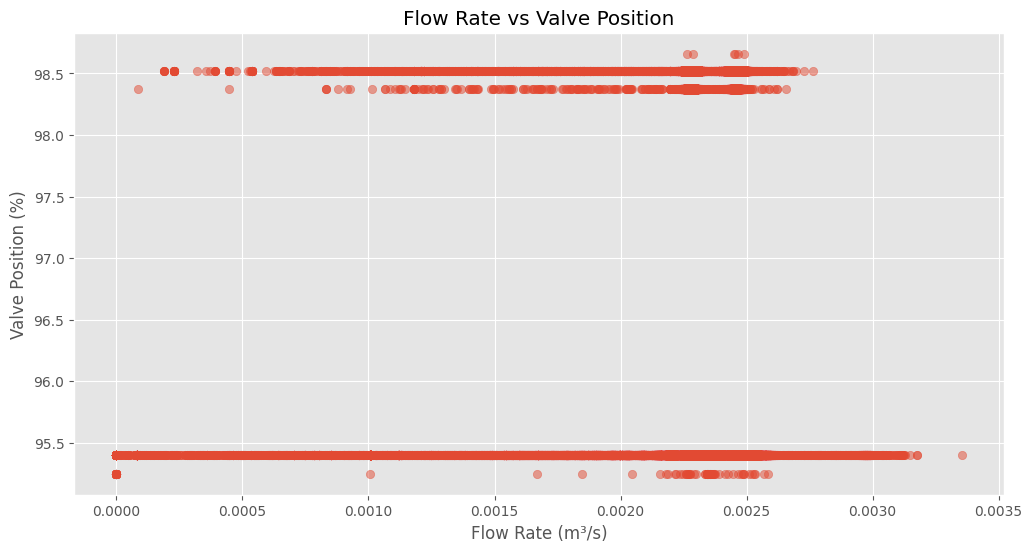

In [86]:
# Create scatter plot of valve position vs flow rate
plt.figure(figsize=(12, 6))
# Filter out 0,0 points
filtered_df = df_device[(df_device["RelPos_Fb"] != 0) | (df_device["AbsFlow_Fb_m3s"] != 0)]
plt.scatter(filtered_df["AbsFlow_Fb_m3s"], filtered_df["RelPos_Fb"], alpha=0.5)
plt.xlabel("Flow Rate (m³/s)")
plt.ylabel("Valve Position (%)")
plt.title("Flow Rate vs Valve Position")
plt.grid(True)
plt.show()

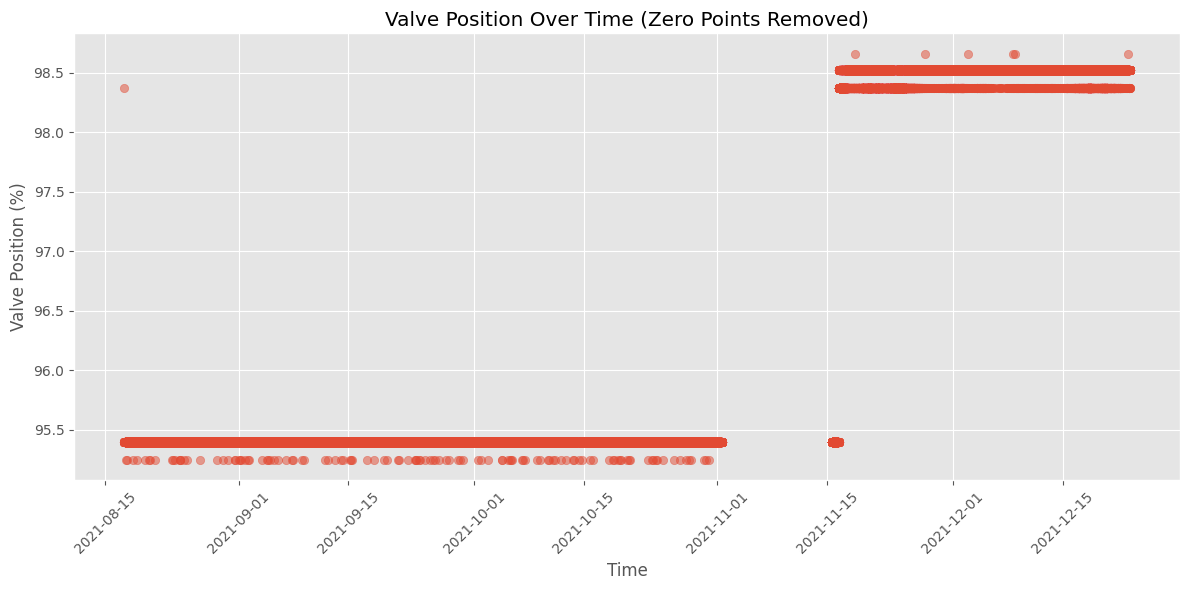

In [87]:
# Plot valve position over time
plt.figure(figsize=(12, 6))
# Filter out zero valve positions
filtered_df = df_device[df_device["RelPos_Fb"] != 0]
plt.scatter(filtered_df["sample_time"], filtered_df["RelPos_Fb"], alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Valve Position (%)")
plt.title("Valve Position Over Time (Zero Points Removed)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

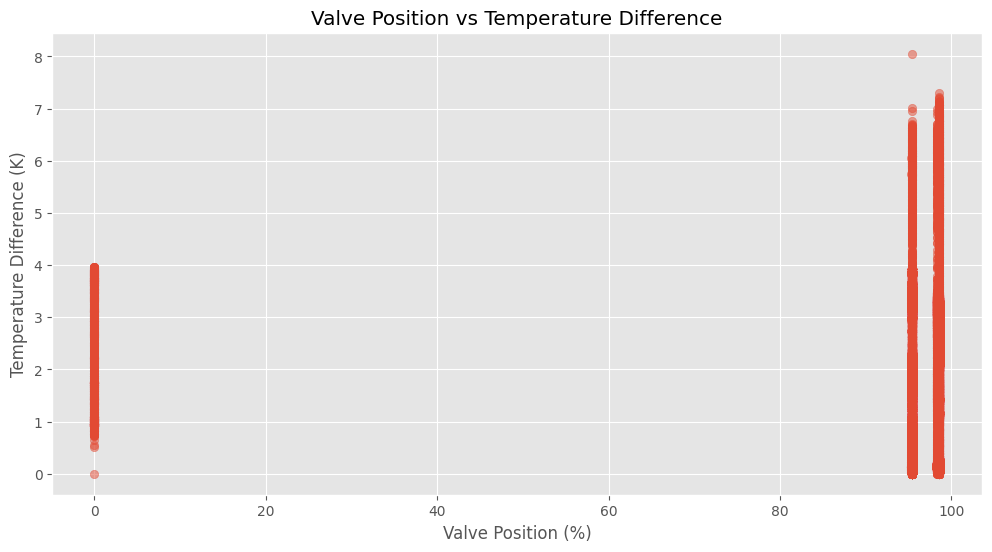

In [88]:
# Create scatter plot of valve position vs DeltaT
plt.figure(figsize=(12, 6))

plt.scatter(df_device["RelPos_Fb"], df_device["DeltaT_K"], alpha=0.5)
plt.xlabel("Valve Position (%)")
plt.ylabel("Temperature Difference (K)")
plt.title("Valve Position vs Temperature Difference")
plt.grid(True)
plt.show()

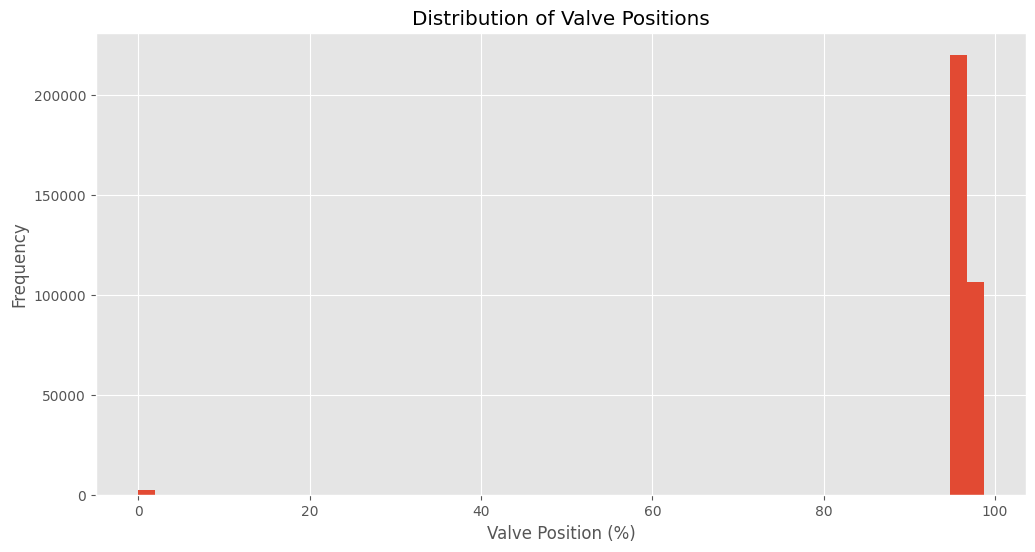

In [89]:
# Create histogram of valve positions
plt.figure(figsize=(12, 6))

plt.hist(df_device["RelPos_Fb"], bins=50)
plt.xlabel("Valve Position (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Valve Positions")
plt.grid(True)
plt.show()

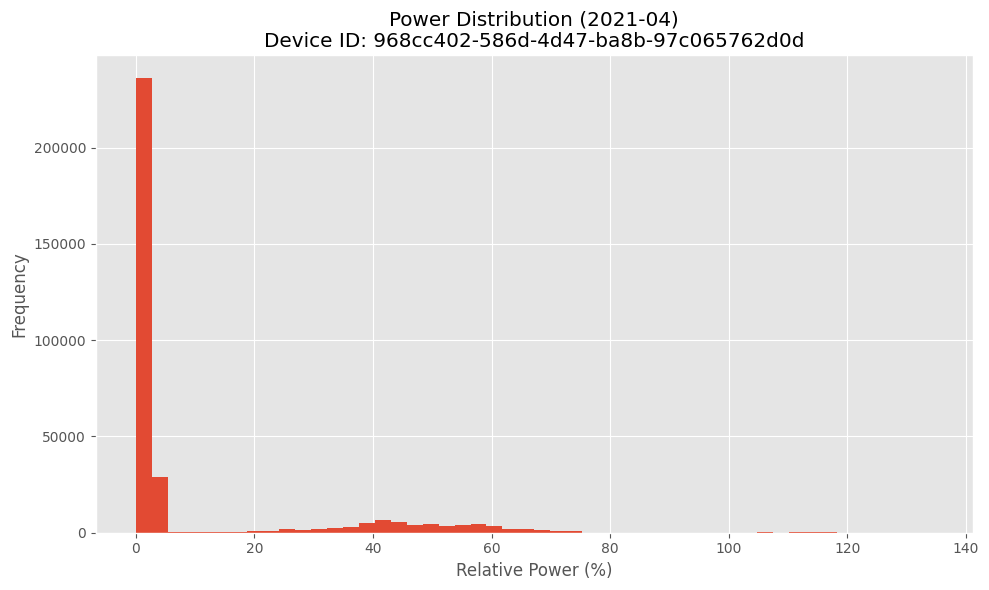

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df_device['RelPower_Fb_Rel2Pmax'], bins=50)
plt.xlabel('Relative Power (%)')
plt.ylabel('Frequency')
plt.title(f"Power Distribution ({year_month})\nDevice ID: {device_id}")
plt.tight_layout()
plt.show()

### Plot
Heat Exchanger Characteristic

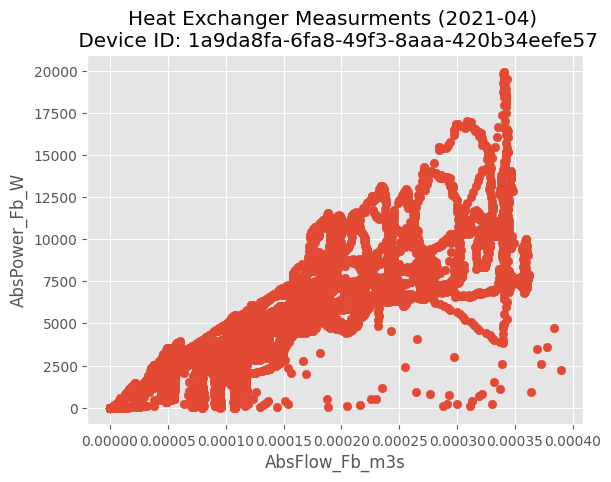

In [44]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202104"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df_data[x], df_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

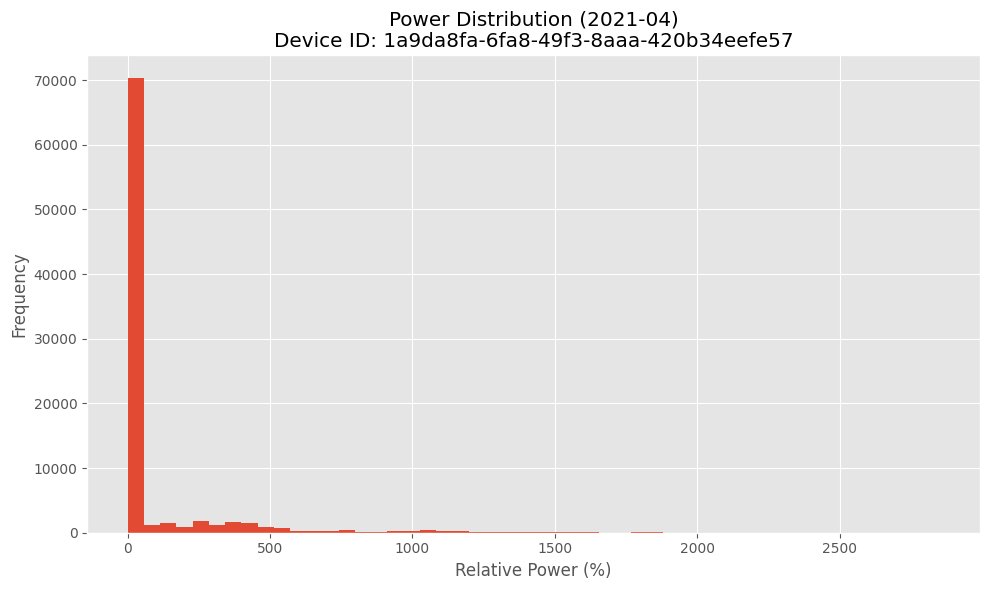

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df_data['RelPower_Fb_Rel2Pmax'], bins=50)
plt.xlabel('Relative Power (%)')
plt.ylabel('Frequency')
plt.title(f"Power Distribution ({year_month})\nDevice ID: {device_id}")
plt.tight_layout()
plt.show()

## API Data
Cloud api logs describing interactions with our cloud.

In [43]:
# df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(3)
# df.toPandas()
import matplotlib as plt

# Load the API logs data
df_api_logs = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(100)

# Convert to pandas for easier plotting
df_data = df_api_logs.toPandas()

25/03/20 01:34:00 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.cc_api_logs_6f9dd244d08cc1662de7c092777a7293c4ffb05d94fa727d11ab815f6530b11f/_delta_log/00000000000000000000.json.
25/03/20 01:34:00 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.cc_api_logs_6f9dd244d08cc1662de7c092777a7293c4ffb05d94fa727d11ab815f6530b11f/_delta_log.


In [41]:
# Convert timestamp to datetime if needed
df_data['timestamp'] = pd.to_datetime(df_data['timestamp'])

# Group by hour and count
hourly_calls = df_data.groupby(df_data['timestamp'].dt.hour)['requestURI'].count()

plt.figure(figsize=(12, 6))
hourly_calls.plot(kind='line', marker='o')
plt.title('API Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

NameError: name 'df_data' is not defined